<a href="https://colab.research.google.com/github/abenben/starproject-python/blob/master/slide09-base/mathplot-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.7.円グラフ(matplotlib)

In [1]:
!pip install japanize-matplotlib

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib 

import warnings
warnings.filterwarnings("ignore", module="matplotlib")

%matplotlib inline

([<matplotlib.patches.Wedge at 0x7fdb70448b00>,
 [Text(0.231747161621997, 1.0753107704659841, 'バス'),
  Text(-0.8257395081931929, -0.7267422270715141, '車'),
  Text(0.8843968467139554, -0.6540964894588664, '自転車')])

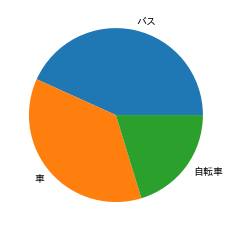

In [3]:
# 2.7.1　円グラフの描画

# データの作成
labels = ["バス", "車", "自転車"]
sizes = [320, 270, 150]
fig, ax = plt.subplots(1, 1)

# 円グラフの描画
ax.pie(sizes, labels=labels)

Text(-0.3, 0, '(0, 0)')

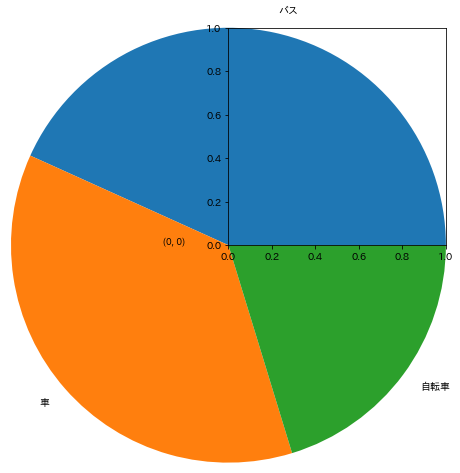

In [4]:
# 2.7.2　円グラフと軸の関係を描画

fig, ax = plt.subplots(1, 1)
ax.pie(sizes, labels=labels, frame=True)
ax.text(-0.3, 0, "(0, 0)", fontsize=9)

In [5]:
# 2.7.3　anime_genre_top10_pivoted.csv ファイルの読み込み

from urllib.parse import urljoin
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_genre_top10_pivoted_csv = urljoin(
    base_url, "anime_genre_top10_pivoted.csv"
)
df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col="genre")
df

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


In [6]:
# 2.7.4　データの並べ替え

# TV
df_tv = df["TV"].sort_values(ascending=False)

# Movie
df_movie = df["Movie"].sort_values(ascending=False)

In [7]:
# 2.7.5　データを降順に並べ替え（TV および Movie）
df_tv, df_movie

(genre
 Comedy          65420862.0
 Action          63364032.0
 Drama           41011557.0
 Romance         40703388.0
 Supernatural    38956520.0
 Shounen         35532847.0
 School          35489099.0
 Fantasy         34932563.0
 Sci-Fi          28072322.0
 Adventure       27529975.0
 Name: TV, dtype: float64, genre
 Action          10224960.0
 Adventure        9485223.0
 Drama            9034099.0
 Fantasy          8019406.0
 Comedy           7293127.0
 Sci-Fi           6967146.0
 Shounen          5698808.0
 Supernatural     5452779.0
 Romance          5245386.0
 School           1512533.0
 Name: Movie, dtype: float64)

Text(0.5, 1.0, 'Movie')

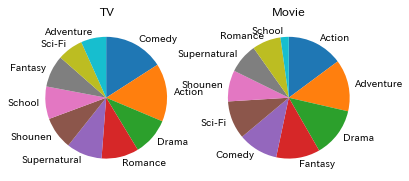

In [8]:
# 2.7.6　TV と Movie とのジャンル内訳比較のための円グラフを描画（デフォルト）

fig, axes = plt.subplots(1, 2)

# TVの円グラフ
axes[0].pie(df_tv, labels=df_tv.index, startangle=90, counterclock=False)

# Movieの円グラフ
axes[1].pie(df_movie, labels=df_movie.index, startangle=90, counterclock=False)
axes[0].set_title("TV")
axes[1].set_title("Movie")

In [9]:
# 2.7.7　Color 列の追加

df["Color"] = [
    "gold",
    "orangered",
    "plum",
    "pink",
    "orchid",
    "lightseagreen",
    "lightskyblue",
    "yellowgreen",
    "coral",
    "cornflowerblue",
]
df

,Movie,Music,ONA,OVA,Special,TV,Color
genre,,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0,gold
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0,orangered
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0,plum
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0,pink
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0,orchid
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0,lightseagreen
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0,lightskyblue
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0,yellowgreen
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0,coral


In [10]:
# 2.7.8　データを降順にソート

# TV
df_tv_color = df[["TV", "Color"]].sort_values(by="TV", ascending=False)

# Movie
df_movie_color = df[["Movie", "Color"]].sort_values(by="Movie", ascending=False)

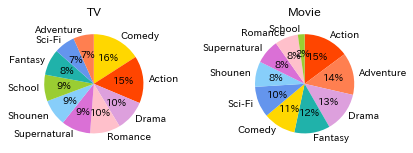

In [11]:
# 2.7.9　TV と Movie とのジャンル内訳比較のための円グラフを描画

fig, axes = plt.subplots(1, 2)

# TVの円グラフ
axes[0].pie(
    df_tv_color["TV"],
    labels=df_tv_color.index,
    colors=df_tv_color["Color"],
    autopct="%1.0f%%",
    startangle=90,
    counterclock=False,
)

# Movieの円グラフ
axes[1].pie(
    df_movie_color["Movie"],
    labels=df_movie_color.index,
    colors=df_movie_color["Color"],
    autopct="%1.0f%%",
    startangle=90,
    counterclock=False,
)
axes[0].set_title("TV")
axes[1].set_title("Movie")

# サブプロット間のスペース調整
fig.subplots_adjust(wspace=0.7)